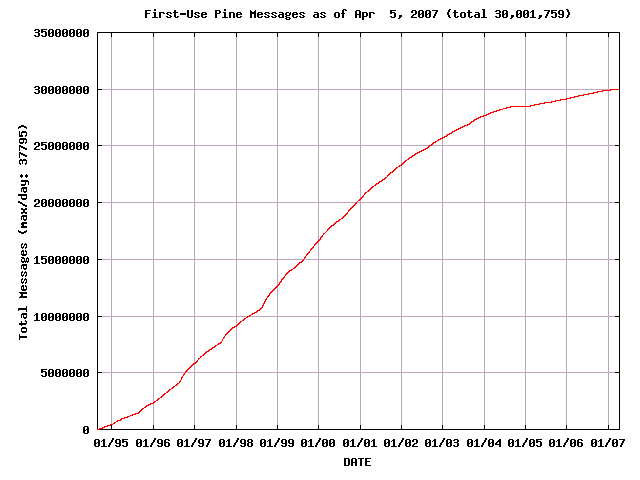

480
640
3


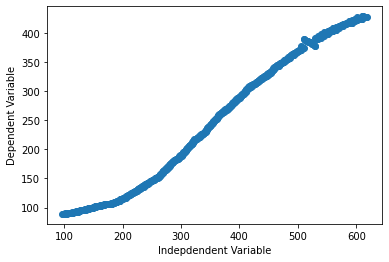

number of data points
(816,)
[-4.97827388e-06  5.51317893e-03 -1.06365233e+00  1.48856910e+02]


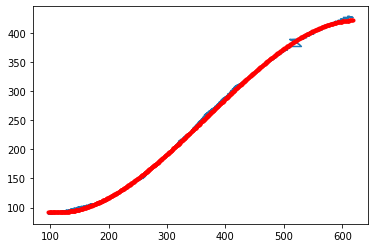

In [7]:
#import python libraries
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

#call the picture that you want to extract data from
url = "https://staff.washington.edu/corey/pine-stats/combinedT.gif"

#extract the RGB pixel values
image = io.imread(url)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

#name the image array
image_array = np.array(image)
image_array.shape

#Extract the data points. In our picture, our data is red so we only extract values that are not black or white. (0,0,0) or (255,255,255)
np.unique(image_array.reshape((480*640, 3)), axis=0)
y_arr, x_arr = np.where((image_array[:,:,0] == 0) & (image_array[:,:,1]==0) & (image_array[:,:,2]==255))
points = np.array([x_arr, y_arr])

#Verify the shape of the data. Then flip the data invert the x values to correctly arrange the array.
points.shape
r_x_arr= x_arr[::-1]

#print the data to ensure that the data was extracted correctly.
Corrected_points = np.array([r_x_arr, y_arr])
plt.scatter(Corrected_points[0, :], Corrected_points[1, :]) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#define the type of equation
def bpm(x,c0,c1,c2,c3):
  return c0*x**3 +c1*x**2+c2*x**1+c3
x_data = Corrected_points[0,:]
y_data = Corrected_points[1,:]
print("number of data points")
print(y_data.shape)
y_new = np.zeros(816)
g = [20,0.01,80,0.01]
c,cov = curve_fit(bpm,r_x_arr,y_arr,g)
print(c)
# For C values of [-4.98E-6,5.51E-3,-1.06E0,1.49E2]
# The equation would be y= -.00000498x^3+.00551x^2-1.06x+149 

length = len(x_data)

for i in range(length):
  y_new[i] = bpm(x_data[i],c[0],c[1],c[2],c[3])

plt.plot(r_x_arr,y_arr)
plt.plot(r_x_arr,y_new,'r.')
